In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
from collections import Counter

In [4]:
data = pd.read_csv(r"C:\Projects\Resume-Selector\data\UpdatedResumeDataSet.csv")
data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [10]:
data.shape

(962, 2)

In [6]:
def extract_keywords(column, pattern):
    matches = []
    for text in column:
        matches.extend(re.findall(pattern, text, flags=re.IGNORECASE))
    return matches

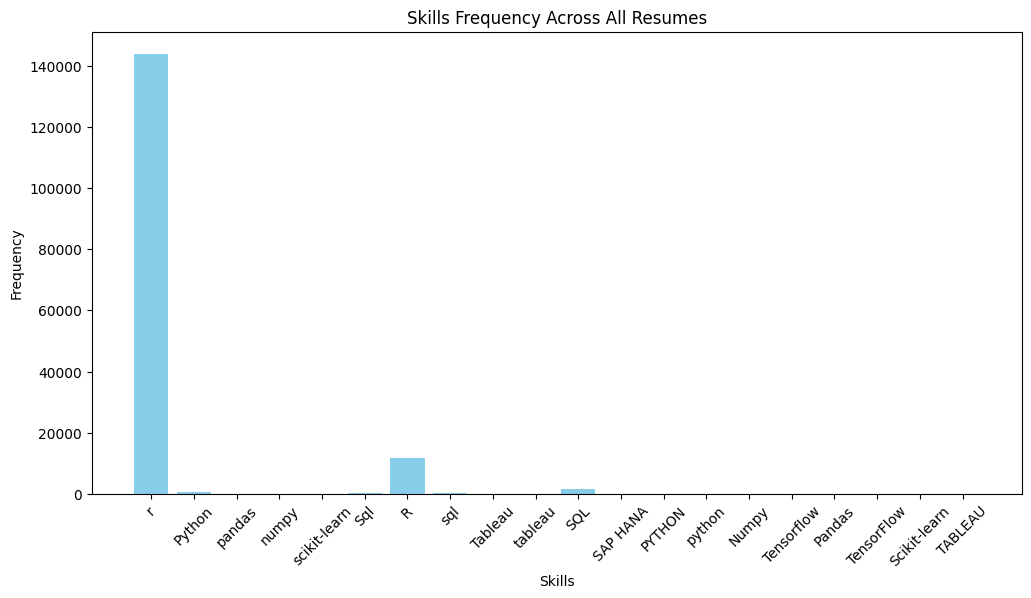

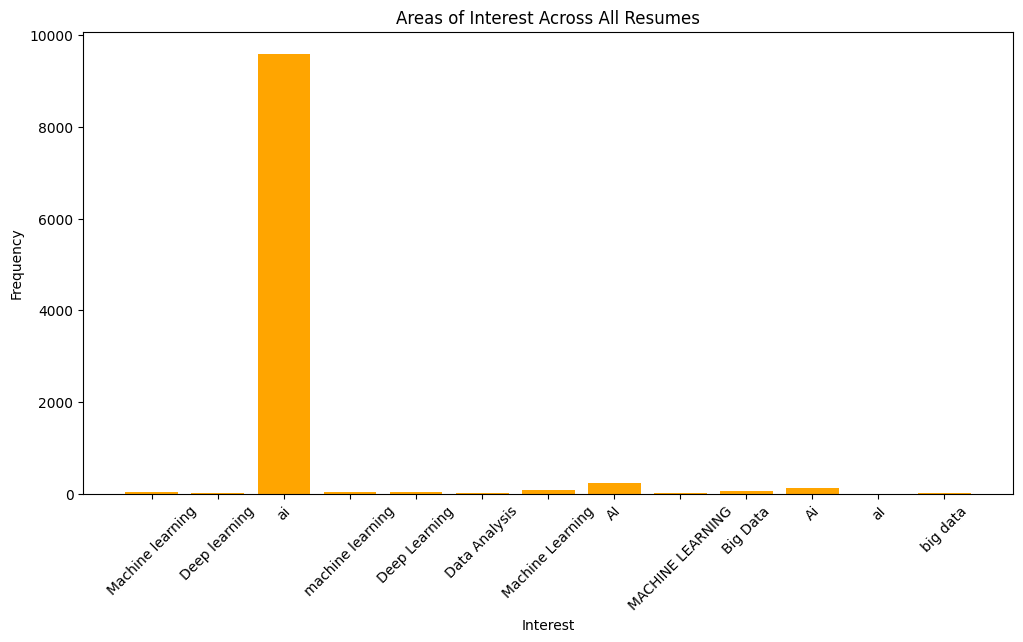

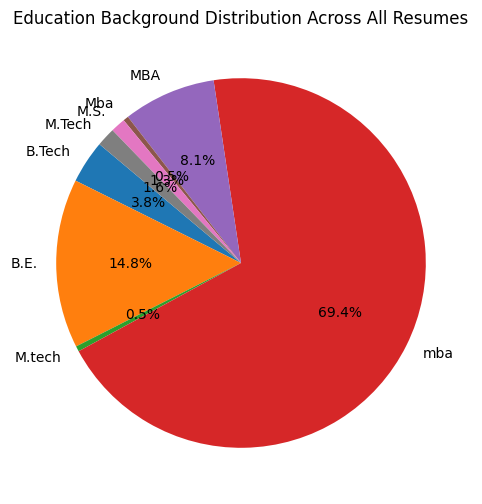

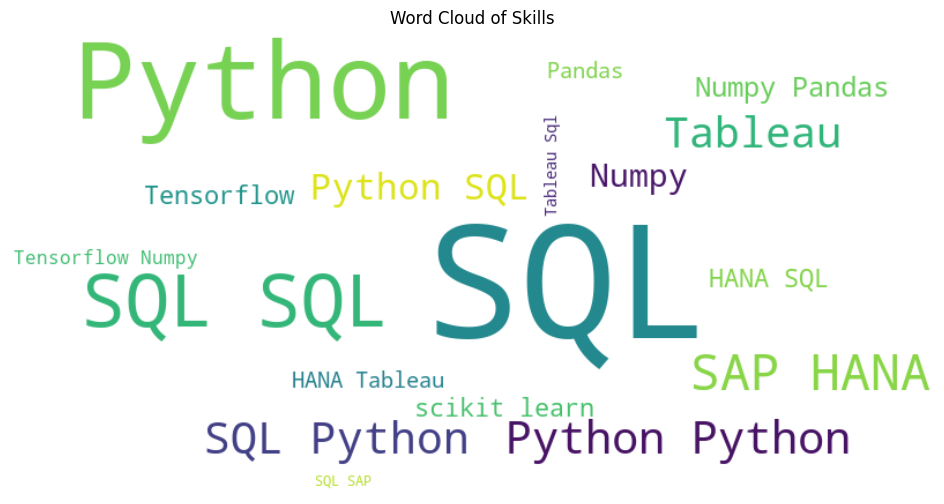

In [13]:
def extract_keywords(column, pattern):
    matches = []
    for text in column:
        matches.extend(re.findall(pattern, str(text), flags=re.IGNORECASE))
    return matches

skills_pattern = r"(Python|R|SQL|Tableau|SAP HANA|pandas|numpy|scikit-learn|TensorFlow|PyTorch)"
skills = extract_keywords(data["Resume"], skills_pattern)

skills_count = Counter(skills)

interest_pattern = r"(Deep Learning|Control Systems|AI|Machine Learning|Data Analysis|Big Data)"
interests = extract_keywords(data["Resume"], interest_pattern)
interest_count = Counter(interests)

education_pattern = r"(B\.E\.|M\.S\.|B\.Tech|M\.Tech|Ph\.D|MBA)"
education = extract_keywords(data["Resume"], education_pattern)
education_count = Counter(education)

plt.figure(figsize=(12, 6))
plt.bar(skills_count.keys(), skills_count.values(), color='skyblue')
plt.title("Skills Frequency Across All Resumes")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(interest_count.keys(), interest_count.values(), color='orange')
plt.title("Areas of Interest Across All Resumes")
plt.xlabel("Interest")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(education_count.values(), labels=education_count.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Education Background Distribution Across All Resumes")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(skills))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Skills")
plt.show()


c:\a\envs\resume\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\a\envs\resume\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\a\envs\resume\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


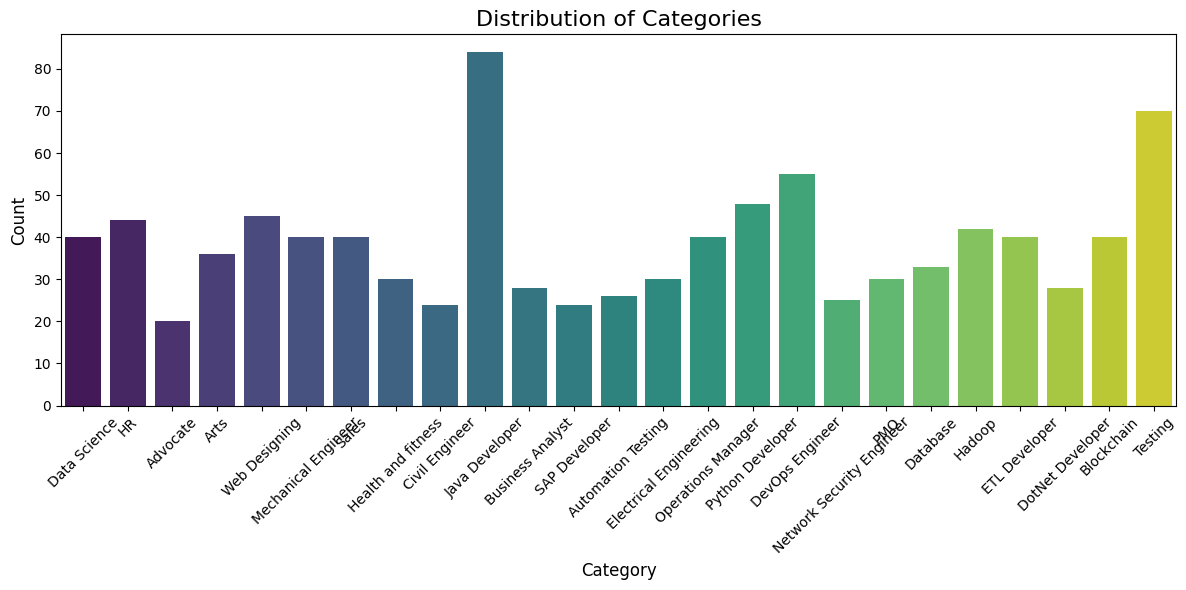

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', palette='viridis')

plt.title("Distribution of Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
